In [1]:
import tensorflow as tf
from PIL import Image
from tensorflow.keras import layers

2022-12-17 18:38:09.642297: I tensorflow/core/platform/cpu_feature_guard.cc:193] This TensorFlow binary is optimized with oneAPI Deep Neural Network Library (oneDNN) to use the following CPU instructions in performance-critical operations:  AVX2 FMA
To enable them in other operations, rebuild TensorFlow with the appropriate compiler flags.
2022-12-17 18:38:17.500096: W tensorflow/stream_executor/platform/default/dso_loader.cc:64] Could not load dynamic library 'libcudart.so.11.0'; dlerror: libcudart.so.11.0: cannot open shared object file: No such file or directory
2022-12-17 18:38:17.500164: I tensorflow/stream_executor/cuda/cudart_stub.cc:29] Ignore above cudart dlerror if you do not have a GPU set up on your machine.
2022-12-17 18:38:18.289516: E tensorflow/stream_executor/cuda/cuda_blas.cc:2981] Unable to register cuBLAS factory: Attempting to register factory for plugin cuBLAS when one has already been registered
2022-12-17 18:38:39.656720: W tensorflow/stream_executor/platform/de

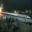

In [2]:
img=Image.open("./archive/cifar10/test/airplane/1001_airplane.png")
img

In [4]:
data=tf.keras.utils.image_dataset_from_directory(
    "./archive/cifar10/train/",
    image_size=(32,32),
    color_mode="rgb",
    batch_size=5000
)

Found 50000 files belonging to 10 classes.


In [5]:
cnn_model=tf.keras.Sequential([
    layers.Conv2D(9,3,padding="same",input_shape=(32,32,3)),
    layers.MaxPool2D(),
    layers.Conv2D(18,3,padding="same"),
    layers.MaxPool2D(),
    layers.Conv2D(36,3),
    layers.MaxPool2D(),
    layers.Flatten(),
    layers.Dense(64,activation="relu"),
    layers.Dense(10),
    layers.Softmax()
    
])

In [6]:
cnn_model.build(input_shape=(1,32,32,3))
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

In [7]:
cnn_model.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        

In [8]:
cnn_model.compile(
    loss=tf.keras.losses.categorical_crossentropy,
    optimizer=tf.keras.optimizers.Adam(0.001),
    metrics=["accuracy"]
)

In [9]:
for features,labels in data:
    features=tf.divide(features,255)
    labels=tf.one_hot(labels,10)
    print(features.shape,labels.shape)
    record=cnn_model.fit(features,labels,batch_size=50,epochs=10)
    break

2022-12-17 18:42:37.525520: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1050 of 40000
2022-12-17 18:42:47.478346: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 1867 of 40000
2022-12-17 18:42:57.640926: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 2684 of 40000
2022-12-17 18:43:07.473665: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3241 of 40000
2022-12-17 18:43:17.561075: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 3780 of 40000
2022-12-17 18:43:27.558553: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 4355 of 40000
2022-12-17 18:43:37.537236: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling 

2022-12-17 18:51:38.544739: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 37378 of 40000
2022-12-17 18:51:47.489759: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 37469 of 40000
2022-12-17 18:51:57.471127: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 37758 of 40000
2022-12-17 18:52:07.488210: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 38257 of 40000
2022-12-17 18:52:17.473460: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 38633 of 40000
2022-12-17 18:52:27.466478: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:390] Filling up shuffle buffer (this may take a while): 39665 of 40000
2022-12-17 18:52:30.762202: I tensorflow/core/kernels/data/shuffle_dataset_op.cc:415] Sh

(5000, 32, 32, 3) (5000, 10)
Epoch 1/10
  1/100 [..............................] - ETA: 8:25 - loss: 2.3262 - accuracy: 0.1200

2022-12-17 18:53:38.630069: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14160096 exceeds 10% of free system memory.
2022-12-17 18:53:38.643612: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 14160096 exceeds 10% of free system memory.
2022-12-17 18:53:38.647807: W tensorflow/core/framework/cpu_allocator_impl.cc:82] Allocation of 24385536 exceeds 10% of free system memory.


100/100 [==============================] - 13s 78ms/step - loss: 2.1048 - accuracy: 0.2124
Epoch 2/10
100/100 [==============================] - 8s 78ms/step - loss: 1.8261 - accuracy: 0.3354
Epoch 3/10
100/100 [==============================] - 8s 76ms/step - loss: 1.6727 - accuracy: 0.3986
Epoch 4/10
100/100 [==============================] - 8s 78ms/step - loss: 1.5691 - accuracy: 0.4398
Epoch 5/10
100/100 [==============================] - 7s 73ms/step - loss: 1.4721 - accuracy: 0.4770
Epoch 6/10
100/100 [==============================] - 8s 79ms/step - loss: 1.4028 - accuracy: 0.5028
Epoch 7/10
100/100 [==============================] - 6s 63ms/step - loss: 1.3438 - accuracy: 0.5204
Epoch 8/10
100/100 [==============================] - 8s 75ms/step - loss: 1.2814 - accuracy: 0.5476
Epoch 9/10
100/100 [==============================] - 8s 78ms/step - loss: 1.2224 - accuracy: 0.5726
Epoch 10/10
100/100 [==============================] - 8s 78ms/step - loss: 1.1686 - accuracy: 0.5984

In [12]:
model=cnn_model.save("img_pred.h5",save_format="h5")
model

In [11]:
model1=tf.keras.models.load_model("img_pred.h5")
model1.summary()

Model: "sequential_1"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_3 (Conv2D)           (None, 32, 32, 9)         252       
                                                                 
 max_pooling2d_3 (MaxPooling  (None, 16, 16, 9)        0         
 2D)                                                             
                                                                 
 conv2d_4 (Conv2D)           (None, 16, 16, 18)        1476      
                                                                 
 max_pooling2d_4 (MaxPooling  (None, 8, 8, 18)         0         
 2D)                                                             
                                                                 
 conv2d_5 (Conv2D)           (None, 6, 6, 36)          5868      
                                                                 
 max_pooling2d_5 (MaxPooling  (None, 3, 3, 36)        